<a href="https://colab.research.google.com/github/knight433/NN/blob/Update/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network from scratch
---

(Using MNSIT dataset) <br/>

---

## 0. The intuition behind the calculus of the neural network:

The below shows how the math works in a neural network explained with an example.<br>
(Bear in mind some of the values might be miscalculated.)

### i. Equations and Initial declarations: <br><br>
Assume a neural network having three layers: <br>
1. Input layer $(x)$: Taking 3 input values
2. Hidden layer $(a_1)$: Calculating 2 neuron values with respect to the input values
3. Output layer $(a_2)$: Producing two output predictions for what the results might be

Let the weight matrix from input to hidden layer be $w_1$ and from hidden output layer $w_2. [Dimensions: \; w_1 = (3,2) \;\;\; w_2=(2,2)]$<br>
The bias of the hidden layer will be represented as $b_1$ and the for the output layer $b_2. [Dimensions: \; b_1 = (2,1) \;\;\; b_2=(2,1)]$ <br>
<br>
$l$ will the labels for the expected values.
<br><br>

$Note:$ '⊙' $is \; the \;$ [Hadamard Product](https://en.wikipedia.org/wiki/Hadamard_product_(matrices))

<br><br>

---
<br><br>
Equations for the neuron calculations:<br><br>


> $Hidden \; Layer:$ <br><br>
$z_1 = w_1 ⋅ x + b_1$ <br>
$(2,1) = (2,3) ⋅ (3,1) + (2,1)$<br><br>
$a_1 = σ(z_1)$<br><br><br>
$Output \; Layer:$ <br><br>
$z_2 = w_2 ⋅ a_1 + b_2$ <br>
$(2,1) = (2,2) ⋅ (2,1) + (2,1)$<br><br>
$a_2 = σ(z_2)$<br><br>

---
<br><br>
Equation for cost function:<br><br>


> $Cost \; function \; for \; one \; training \; example\; (MSE): $ <br><br>
$c = (a_2 - l)^2$<br>
$(1,) = [(2,1) - (2,1)]^2$<br><br>
\\\ The dimension 'one' for the cost function is obtained after adding each of the row values <br><br><br>
$Cost \; function \; for \; the \; entire \; training \; set:$<br>
$J(w,b) = \frac{1}{2n} \displaystyle\sum_{i=1}^{n} c_i$<br><br>
\\\ Here 'n' is the number of training examples<br><br>

---
<br><br>
Equation for gradient descent:<br><br>


> $Gradient \; Descent \; for \;the \;output \;layer:$<br><br>
> $Weights:$<br><br>
> $\frac {\partial J(w,b)}{\partial w_2} = \frac {\partial J(w,b)}{\partial a_2}·\frac{\partial a_2}{\partial z_2} ⋅ \frac {\partial z_2}{\partial w_2}$
<br><br>
> >$\frac {\partial J(w,b)}{\partial a_2} = \frac {1}{2} \frac {\partial}{\partial a_2} (a_2 - l)^2 = (a_2 - l)$<br><br>
$\frac {\partial a_2}{\partial z_2} = σ`(z_2) = σ(z_2)[1-σ(z_2)]$<br><br>
$\frac {\partial z_2}{\partial w_2} = a_1$<br><br>

> Hence, $\frac {\partial J(w,b)}{\partial w_2} = (a_2 - l)⊙σ(z_2)[1-σ(z_2)].a_1$.<br><br><br>
$Biases:$<br><br>
$\frac {\partial J(w,b)}{\partial b_2} = \frac {\partial J(w,b)}{\partial a_2} \frac {\partial a_2}{\partial z_2} \frac {\partial z_2}{\partial b_2}$<br><br>
> >$\frac {\partial J(w, b)}{\partial a_2} = \frac {1}{2} \frac {\partial}{\partial a_2} (a_2 - l)^2 = (a_2 - l)$<br><br>
$\frac {\partial a_2}{\partial z_2} = σ`(z_2) = σ(z_2)[1-σ(z_2)] = a_2(1-a_2)$<br><br>
$\frac {\partial z_2}{\partial b_2} = 1$<br><br>

> Hence, $\frac {\partial J(w,b)}{\partial b} = (a_2 - l) ⊙ a_2(1-a_2) ⋅ 1$.<br><br><br><br>
$Gradient \; Descent \; for \;the \;Hidden \;layer:$<br><br>
$Weights:$ <br><br>
$\frac {\partial J(w,b)}{\partial w_1} = \frac {\partial J(w,b)}{\partial a_2}·\frac{\partial a_2}{\partial z_2} ⋅ \frac {\partial z_2}{\partial a_1} ⋅ \frac {\partial a_1}{\partial z_1} ⋅ \frac {\partial z_1}{\partial w_1}$<br><br>
> >$\frac {\partial z_2}{\partial a_1} = w_1$<br><br>
$\frac {\partial a_1}{\partial z_1} = a_1(1-a_1)$<br><br>
$\frac {\partial z_1}{\partial w_1} = x$<br><br>

> Hence, $\frac {\partial J(w,b)}{\partial w_1} = (a_2 - l)⋅a_2[1-a_2]⋅w_2⋅a_1(1-a_1)⋅x$.<br><br>
$w_2$ here refers to the updated weight matrix.
<br><br><br>
$Biases:$ <br><br>
$\frac {\partial J(w,b)}{\partial b_1} = \frac {\partial J(w,b)}{\partial a_2}·\frac{\partial a_2}{\partial z_2} ⋅ \frac {\partial z_2}{\partial a_1} ⋅ \frac {\partial a_1}{\partial z_1} ⋅ \frac {\partial z_1}{\partial b_1}$<br><br>
> >$\frac {\partial z_2}{\partial a_1} = w_2$<br><br>
$\frac {\partial a_1}{\partial z_1} = a_1(1-a_1)$<br><br>
$\frac {\partial z_1}{\partial b_1} = 1$<br><br>

> Hence, $\frac {\partial J(w,b)}{\partial b_1} = (a_2 - l)⋅a_2[1-a_2]⋅w_2⋅a_1(1-a_1)⋅1$. <br><br>

---
<br><br>
Equations for the weights and biases update:<br><br>

>$w_2 = w_2 - α*(\frac {∂J(w,b)}{\partial w_2})$<br><br>
$b_2 = b_2 - α*(\frac {∂J(w,b)}{∂b_2})$<br><br>
$w_1 = w_1 - α*(\frac {∂J(w,b)}{\partial w_1})$<br><br>
$b_1 = b_1 - α*(\frac {∂J(w,b)}{∂b_1})$<br><br>

---
<br><br>
Simplified equations for gradient descent and the update:

> $Gradient\; Descent: $<br><br>
$\frac {∂J(w,b)}{∂w_2} = \frac {∂J(w,b)}{∂b_2} =(a_2 - l) ⊙ [a_2(1-a_2)]$<br><br>
$\frac {∂J(w,b)}{∂w_1} = \frac {∂J(w,b)}{∂b_1} = \frac {∂J(w,b)}{∂w_2} ⋅ w_2 ⋅ a_1(1-a_1)$<br><br><br><br>
$Weights\; and\; Biases\; update:$<br><br>
$w_2 = w_2 - α * [\frac {∂J(w,b)}{∂w_2} ⋅ a_1]$<br><br>
$b_2 = b_2 - α * \frac {∂J(w,b)}{∂b_2}$<br><br>
$w_1 = w_1 - α * [\frac {∂J(w,b)}{∂w_1} ⋅ x]$<br><br>
$b_1 = b_1 - α * \frac {∂J(w,b)}{∂b_1}$<br><br>

---

<br><br>
Initial declarations:<br><br>
$input = x =\begin{bmatrix} 1 & 2 & 3 \end{bmatrix}$ &emsp; $weight_{1} = w_1 = \begin{bmatrix}0.5 & 0.2 \\ 0.8 & 0.6 \\ 0.1 & 0.4 \end{bmatrix}$ &emsp; $bias_{1} = b_1 = \begin{bmatrix} 0.2 \\ 0.3\end{bmatrix}$<br><br><br><br>
$weight_2 = \begin{bmatrix} 0.4 & 0.3 \\ 0.1 & 0.6 \end{bmatrix}$ &emsp; $bias_2 = \begin{bmatrix} 0.3 \\ 0.5\end{bmatrix}$<br><br><br><br>
$ExpectedOutput = l =  \begin{bmatrix} 1 \\ 0\end{bmatrix}$<br><br>

---
---
<br><br>








### ii. Forward Propagation:

<br><br>
$z_{1} = w_1.x + b_1$
---

<br><br>
$z_{1} = \begin{bmatrix}(1*0.5)+(2*0.8)+(3*0.1) \\ (1*0.2)+(2*0.6)+(3*0.4) \end{bmatrix} = \begin{bmatrix} 2.4 \\ 2.6 \end{bmatrix}$
---

<br><br>
$z_{1} = \begin{bmatrix} 2.4+0.2 \\ 2.6+0.3 \end{bmatrix} = \begin{bmatrix} 2.6 \\ 2.9 \end{bmatrix}$
---

<br><br>
$σ_1(z)_{sigmoid} = a_1 = \begin{bmatrix} 0.93086 \\ 0.94784 \end{bmatrix}$
---

<br><br>

---

<br><br>
$z_2 = w_2.a_1 + b_2$
---

<br><br>
$z_{2} = \begin{bmatrix}(0.93086*0.4)+(0.94784*0.1) \\ (0.93086*0.3)+(0.94784*0.6) \end{bmatrix} = \begin{bmatrix} 0.46713 \\ 0.84796 \end{bmatrix}$
---

<br><br>
$z_2 = \begin{bmatrix} 0.46713+0.3 \\ 0.84796+0.5 \end{bmatrix} = \begin{bmatrix} 0.76713 \\ 1.44796 \end{bmatrix}$
---

<br><br>
$σ_2(z)_{sigmoid} = a_2 = \begin{bmatrix} 0.68290 \\ 0.80968 \end{bmatrix}$
---

<br><br>

---
---

<br><br>

### iii. Cost function:

<br><br>
$c = (a_2 - \hat y)^2 = \begin{bmatrix} 0.68290 - 1 \\ 0.80968-0 \end{bmatrix}^2 = \begin{bmatrix} 0.10055 \\ 0.65558\end{bmatrix}$
---

<br><br>
$J(w,b) = \frac{1}{2n} \displaystyle\sum_{i=1}^{n} c_i$
---
Here n = 1 as we taking only a single input example.

<br><br>
$J(w,b) = \frac{1}{2}(0.75613)$
---

<br><br>

---
---
<br><br>


### iv. Backpropagation:

<br><br>
$Gradient\; Descent: $<br><br>
$\frac {∂J(w,b)}{∂w_2} = \frac {∂J(w,b)}{∂b_2} =(a_2 - l) ⊙ [a_2(1-a_2)]$
---

<br><br>
$\frac {∂J(w,b)}{∂w_1} = \frac {∂J(w,b)}{∂b_1} = \frac {∂J(w,b)}{∂w_2} ⋅ w_2 ⋅ a_1(1-a_1)$
---

<br>

$Weights\; and\; Biases\; update:$

<br><br>
$w_2 = w_2 - α * [\frac {∂J(w,b)}{∂w_2} ⋅ a_1]$
---

<br><br>
$b_2 = b_2 - α * \frac {∂J(w,b)}{∂b_2}$
---

<br><br>
$w_1 = w_1 - α * [\frac {∂J(w,b)}{∂w_1} ⋅ x]$
---

<br><br>
$b_1 = b_1 - α * \frac {∂J(w,b)}{∂b_1}$
---

<br><br>
$Gradient \; with \; respect \; to \; the \; second \; set \; of \; weights \; and \; biases:$
---

<br><br>
$\frac {∂J(w,b)}{∂w_2} = \frac {∂J(w,b)}{∂b_2} =(a_2 - l) ⊙ [a_2(1-a_2)]$
---

<br><br>
$\frac {∂J(w,b)}{∂w_2} = \frac {∂J(w,b)}{∂b_2} = \begin{bmatrix} 0.68290 - 1 \\ 0.80968-0 \end{bmatrix} ⊙ \begin{bmatrix} [0.68290*(1-0.68290)] \\ [0.80968*(1-0.80968)] \end{bmatrix}$
---

<br><br>
$ = \begin{bmatrix} -0.31710 \\ 0.80968 \end{bmatrix} ⊙ \begin{bmatrix} 0.21655 \\ 0.15410 \end{bmatrix} = \begin{bmatrix} -0.06867 \\ 0.12477 \end{bmatrix}$
---

<br><br>
$Updating\; the\; second\; set\; weights\; and\; bias\; matrix:$
---

<br><br>
$w_2 = w_2 - α * [\frac {∂J(w,b)}{∂w_2} ⋅ a_1]$
---

<br><br>
$w_2 = \begin{bmatrix} 0.4 & 0.3 \\ 0.1 & 0.6 \end{bmatrix}^T - 0.1\begin{pmatrix}\begin{bmatrix} -0.06867 \\ 0.12477 \end{bmatrix} ⋅ \begin{bmatrix} 0.93086 & 0.94784 \end{bmatrix}\end{pmatrix}$
---

<br><br>
$w_2 = \begin{bmatrix} 0.4 & 0.3 \\ 0.1 & 0.6 \end{bmatrix}^T - 0.1\begin{pmatrix}\begin{bmatrix} -0.06391959 & -0.06508556 \\ 0.11614369 & 0.11826229 \end{bmatrix}\end{pmatrix}$
---

<br><br>
$w_2 = \begin{bmatrix} 0.4 & 0.3 \\ 0.1 & 0.6 \end{bmatrix}^T + \begin{bmatrix} 0.00639196 & 0.00650856 \\ -0.01161437 & -0.01182623 \end{bmatrix}$
---

<br><br>
$w_2 = \begin{bmatrix} 0.40639196 & 0.10650856 \\ 0.28838563 & 0.58817377\end{bmatrix}$
---
<br><br>

<br><br>
$b_2 = b_2 - α * \frac {∂J(w,b)}{∂b_2}$
---

<br><br>
$b_2 = \begin{bmatrix} 0.3 \\ 0.5\end{bmatrix} -  0.1\begin{pmatrix}\begin{bmatrix} -0.06867 \\ 0.12477 \end{bmatrix}\end{pmatrix}$
---

<br><br>
$b_2 = \begin{bmatrix} 0.3 \\ 0.5\end{bmatrix} -  0.1\begin{pmatrix}\begin{bmatrix} -0.06867 \\ 0.12477 \end{bmatrix}\end{pmatrix}$
---

<br><br>
$b_2 = \begin{bmatrix} 0.3 \\ 0.5\end{bmatrix} + \begin{bmatrix}0.006867 \\ -0.012477 \end{bmatrix}$
---

<br><br>
$b_2 = \begin{bmatrix} 0.306867 \\ 0.487523\end{bmatrix}$
---

<br><br>
$Gradient \; with \; respect \; to \; the \; first \; set \; of \; weights \; and \; biases:$
---

<br><br>
$\frac {∂J(w,b)}{∂w_1} = \frac {∂J(w,b)}{∂b_1} = \frac {∂J(w,b)}{∂w_2} ⋅ w_2 ⋅ a_1(1-a_1)$
---

<br><br>
$\frac {∂J(w,b)}{∂w_1} = \frac {∂J(w,b)}{∂b_1} = \begin{bmatrix} -0.06867 \\ 0.12477 \end{bmatrix} ⊙ \begin{bmatrix} 0.4 & 0.3 \\ 0.1 & 0.6 \end{bmatrix} ⋅ \begin{bmatrix} 0.93086(1-0.93086) & 0.94784(1-0.94784) \end{bmatrix}$
---

<br><br>
$\frac {∂J(w,b)}{∂w_1} = \frac {∂J(w,b)}{∂b_1} = \begin{bmatrix} -0.06866724 \\  0.12477031 \end{bmatrix}$
---

<br><br>
$Updating\; the\; first\; set\; weights\; and\; bias\; matrix:$
---

<br><br>
$w_1 = w_1 - α * [\frac {∂J(w,b)}{∂w_1} ⋅ x]$
---

<br><br>
$w_1 =  \begin{bmatrix}0.5 & 0.2 \\ 0.8 & 0.6 \\ 0.1 & 0.4 \end{bmatrix} - 0.1\begin{pmatrix}\begin{bmatrix} -0.00278622 \\ 0.00450415 \end{bmatrix} ⋅ \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}\end{pmatrix}$
---

<br><br>
$w_1 = \begin{bmatrix} 0.50027862 & 0.80055724 & 0.10083587 \\ 0.19954958 & 0.59909917 & 0.39864875 \end{bmatrix}$
---

<br><br>

<br><br>
$b_1 = b_1 - α * \frac {∂J(w,b)}{∂b_1}$
---

<br><br>
$b_1 = \begin{bmatrix} 0.2 \\ 0.3\end{bmatrix} -  0.1\begin{pmatrix}\begin{bmatrix} -0.00278622 \\ 0.00450415 \end{bmatrix}\end{pmatrix}$
---

<br><br>
$b_2 = \begin{bmatrix} 0.20027862 \\ 0.29954958 \end{bmatrix}$
---

<br><br>

---
---

<br><br>

After this, keep calculating the cost and the gradients to update the weights and biases until convergence.
---

<br><br>

---
---


## 1. Network design: <br/>
  The network will consist of 4 layers. <br/>
  - Input layer: Consists of 784 neurons (Flatten 28x28) <br/>
    No other function.
  - Hidden Layer - 1: Consists of 16 neurons (Neurons size decided arbitrarily) <br/>
    Activation function: Sigmoid
  - Hidden Layer - 2: Consists of 16 neurons <br/>
    Activation function: ReLU
  - Output Layer: Consists of 10 neurons (To give the predictions of the 10 digits) <br/>
    Activation function ReLU
<br/>
<br/>

![Source: 3Blue1Brown](https://drive.google.com/uc?export=view&id=1kWIICK5Rp7gkbYIfaotag3WCP9oB0spR)

Image by 3Blue1Brown

## 2. Train/Test dataset: <br/>
  The dataset used is [MNSIT dataset](https://www.kaggle.com/datasets/hojjatk/mnist-dataset) provided by 'Kaggle'.<br/>
  (The data in the dataset is of a different format. To access it, functions to access the data is given by the provider.) <br/>
  The dataset contains images of handwritten digits each of dimension 28x28. Each of the images have a label associated with it signifying the digit it's representing.

In [ ]:
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath

    def read_images_labels(self, images_filepath, labels_filepath):
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())

        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img

        return images, labels

    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)

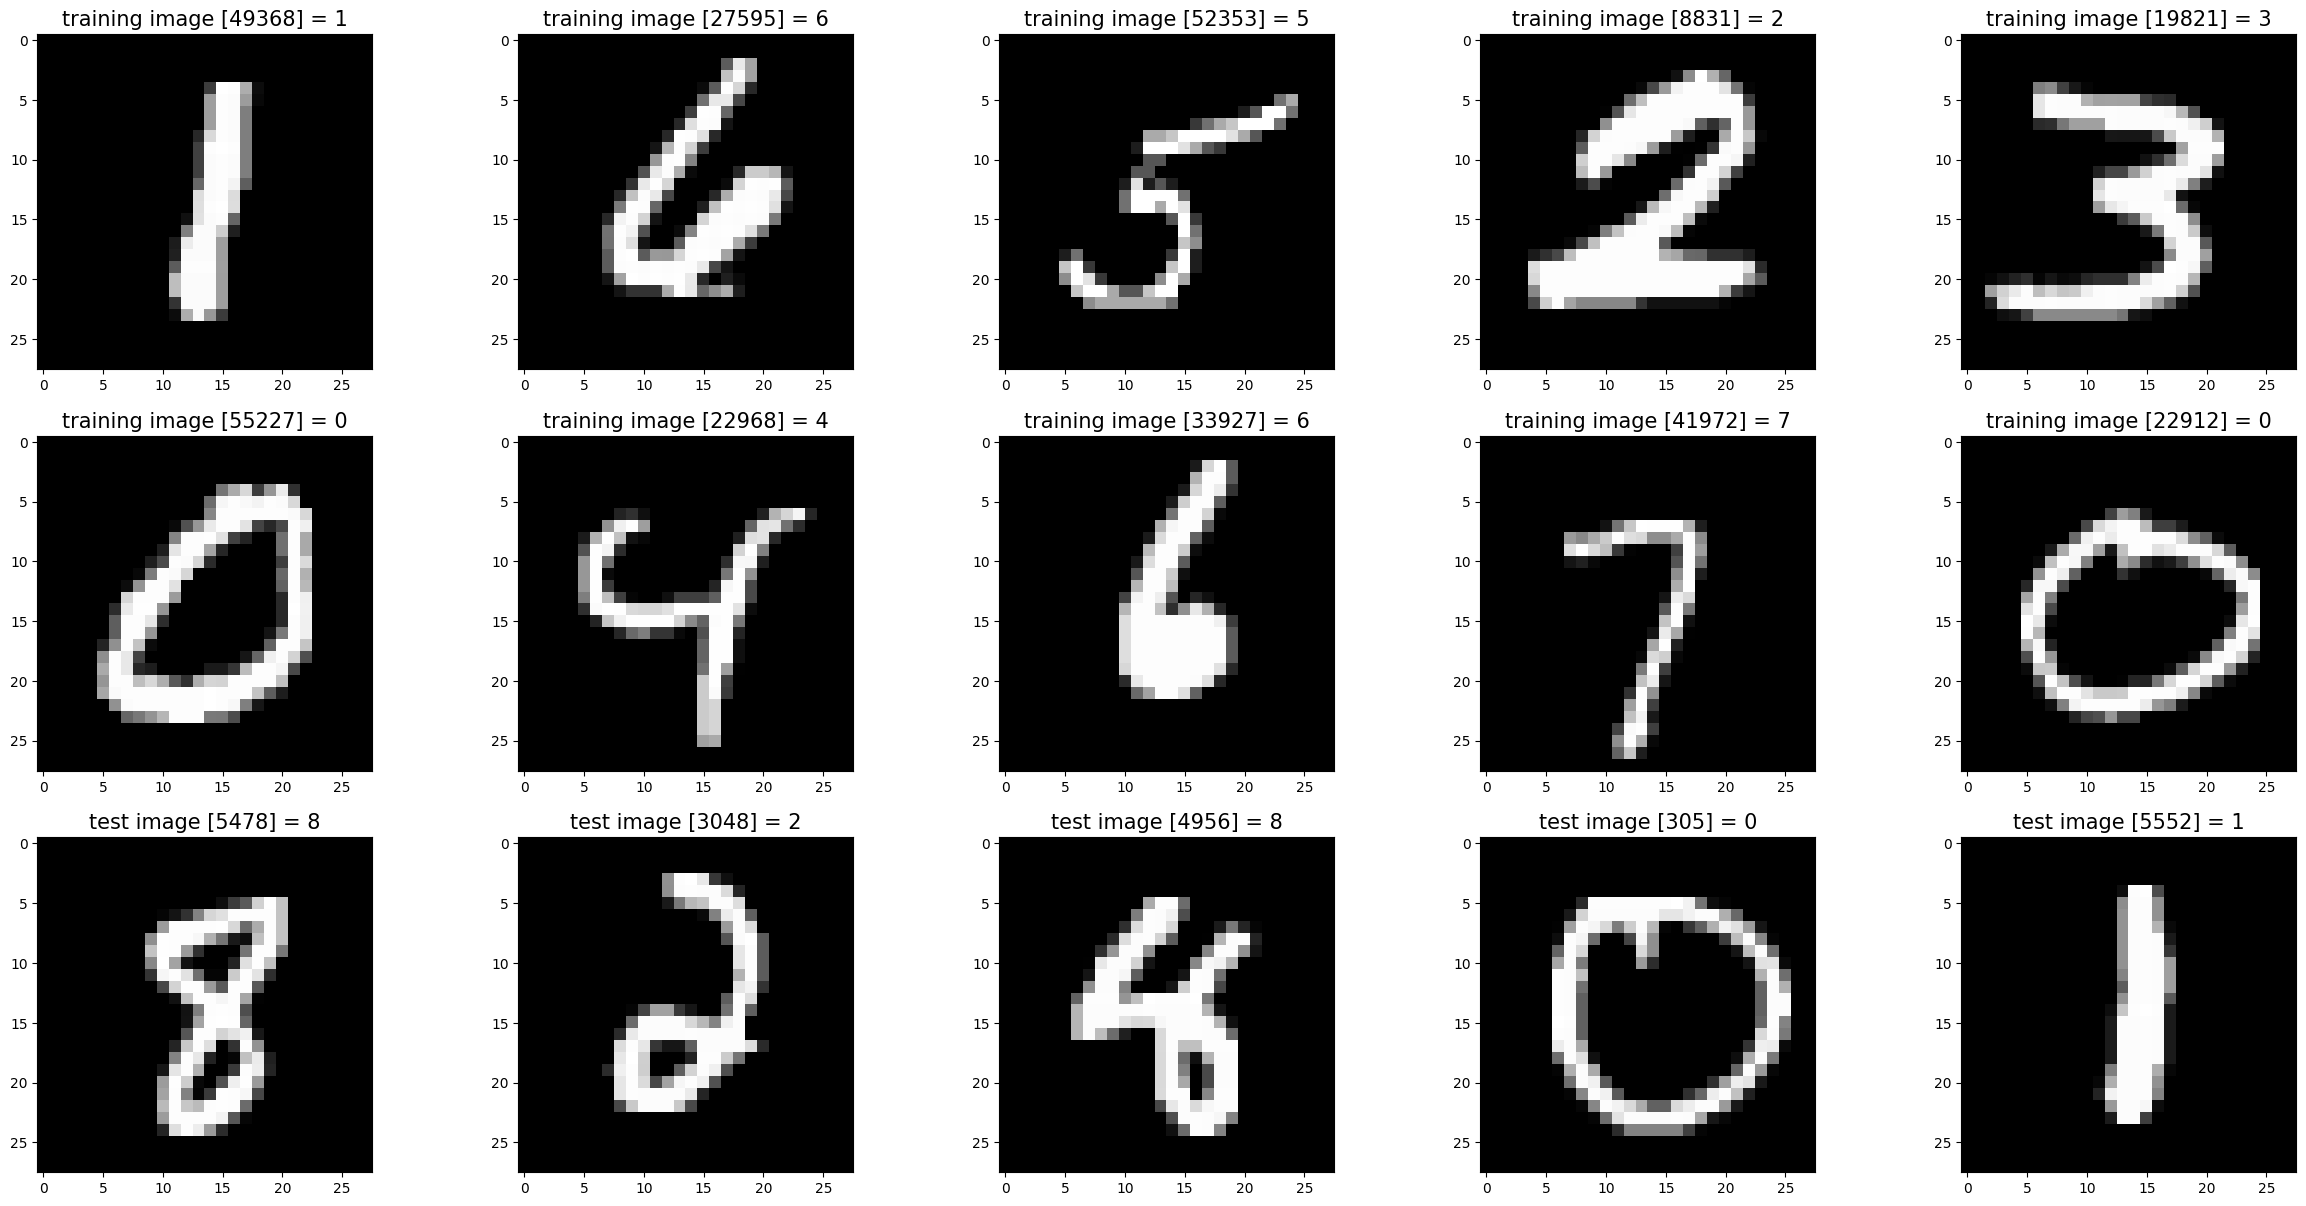

In [ ]:
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = '/content/drive/MyDrive/Python /NN from scratch/MNIST Dataset/'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1
    for x in zip(images, title_texts):
      image = x[0]
      title_text = x[1]
      plt.subplot(rows, cols, index)
      plt.imshow(image, cmap=plt.cm.gray)
      if (title_text != ''):
          plt.title(title_text, fontsize = 15);
      index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))

show_images(images_2_show, titles_2_show)

## 3. The Layer Class: <br/>
- Constructor Parameters:
    - m: 1 dimensional input **Matrix**
    - n: Current layer's no. of **Neurons**
    - act: **Activation** function set for the layer. <br/><br/>

  > Initializes a *weight matrix* of **m** rows and **n** columns and *1-d bias matrix* of size **n**. <br/>
  Ex:  
  $weights =
  \begin{bmatrix} w_{1, 1} & w_{1, 2} & w_{1, 3} & \cdots & w_{1,n} \\
   w_{2, 1} & w_{2, 2} & w_{2, 3} & \cdots & w_{2,n} \\
   w_{3, 1} & w_{3, 2} & w_{3, 3} & \cdots & w_{3,n} \\
   \vdots & \vdots & \vdots & \ddots & \vdots \\
   w_{m, 1} & w_{m, 2} & w_{m, 3} & \cdots & w_{m,n}  \end{bmatrix}$,&emsp;&emsp;$bias =
  \begin{bmatrix} b_{1} \\
   b_{2} \\
   b_{3} \\
   \vdots \\
   b_{n} \end{bmatrix}$


<br/>
<br/>

- Functions:
    - ***get_values***
    - ***apply_activation***:
        - values: 1-d matrix  
    
  > ***get_values*** calculates the output of the current layer's neuron values by taking the **dot product** of $m$ and $weights$. $bias$ is added to the results.<br/><br/>
  $z = w.x +b$
  <br/><br/><br/>
  ***apply_activation*** applies the specified activation function to the set of values and returns them. <br/><br/>
  $\hat y = σ(z)$ Here $\sigma$ is the activation function. &emsp;&emsp; $σ(z)_{sigmoid} = \frac{1}{1 + e^{-z}}$, &emsp;&emsp; $σ(z)_{ReLU} = max(0, z)$

<br/><br/>




In [ ]:
class Layer:
    def __init__(self, m, n, activation):
      self.input = m
      self.weights = np.random.rand(m.shape[1], n)
      self.bias = np.random.rand(1, n)
      self.activation = activation.lower()

    def apply_activation(self, values):
      if self.activation == 'relu':
          return np.maximum(0, values)
      elif self.activation == 'sigmoid':
          return 1 / (1 + np.exp(-values))
      elif self.activation == 'tanh':
          return np.tanh(values)
      else:
          return values

    def getValues(self):
      vals = np.dot(self.input, self.weights)
      neuron_vals =  + self.bias
      return self.apply_activation(neuron_vals)

In [ ]:
import random

def flat(matrix):
  return np.matrix(matrix.flatten())

r = random.randint(0, len(x_train))

img, label = x_train[r], y_train[r]

in_lay = flat(np.concatenate(img))
hidLay_1 = Layer(in_lay, 16, "Sigmoid")
hidLay_2 = Layer(hidLay_1.getValues(), 16, "ReLU")
outLay = Layer(hidLay_2.getValues(), 10, "ReLU")

print(f"{hidLay_1.input.shape}\t{hidLay_1.weights.shape}\t{hidLay_1.bias.shape}\t{hidLay_1.getValues().shape}")
print(f"{hidLay_2.input.shape}\t{hidLay_2.weights.shape}\t{hidLay_2.bias.shape}\t{hidLay_2.getValues().shape}")
print(f"{outLay.input.shape}\t{outLay.weights.shape}\t{outLay.bias.shape}\t{outLay.getValues().shape}")
exp_res = np.zeros(10)
exp_res[label] += 1
print(exp_res)
print(outLay.getValues(), outLay.getValues() - exp_res)
cost = (outLay.getValues() - exp_res)**2
print(cost.shape)

(1, 784)	(784, 16)	(1, 16)	(1, 16)
(1, 16)	(16, 16)	(1, 16)	(1, 16)
(1, 16)	(16, 10)	(1, 10)	(1, 10)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0.17841831 0.32751544 0.63011084 0.57426857 0.55955887 0.81598638
  0.25674248 0.81824397 0.58714098 0.714783  ]] [[-0.82158169  0.32751544  0.63011084  0.57426857  0.55955887  0.81598638
   0.25674248  0.81824397  0.58714098  0.714783  ]]
(1, 10)
